In [1]:
import warnings

import pandas as pd
import numpy as np

from datetime import date
from scipy import stats
from sklearn import preprocessing

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [3]:
warnings.simplefilter('ignore')

In [4]:
def load_ymd_df(path):
    df = pd.read_json(path, lines=True)
    df = df[df.year >= 2017]
    df['date'] = df.apply(lambda r: date(int(r.year), int(r.month), int(r.day)), 1)
    df = df.sort_values('date')
    return df

In [5]:
dh_vol_tweets = load_ymd_df('../../data/decahose-vol-tweets.json/part-00000-accff8bd-8a8f-4cec-8a58-90aca925b3bc-c000.json')

In [6]:
dh_vol_links = load_ymd_df('../../data/decahose-vol-links.json/part-00000-5cafe3fa-4640-4a9c-9738-3ebd57e2aa61-c000.json')

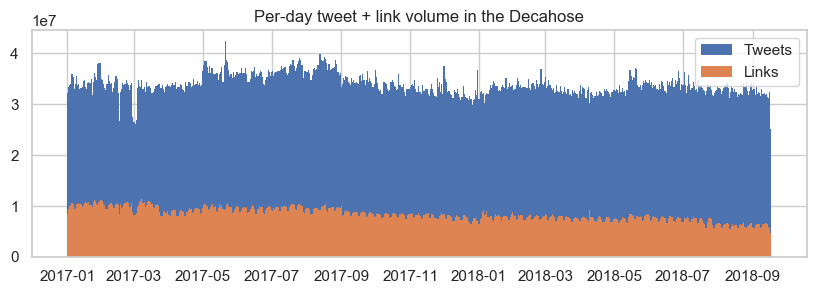

In [7]:
plt.figure(figsize=(10,3), dpi=100)

plt.title('Per-day tweet + link volume in the Decahose')

plt.bar(dh_vol_tweets.date.unique(), dh_vol_tweets['count'], linewidth=0, width=1, label='Tweets')
plt.bar(dh_vol_links.date.unique(), dh_vol_links['count'], linewidth=0, width=1, label='Links')
plt.legend()

plt.savefig('figures/decahose-tweet-link-vol.png', bbox_inches='tight')

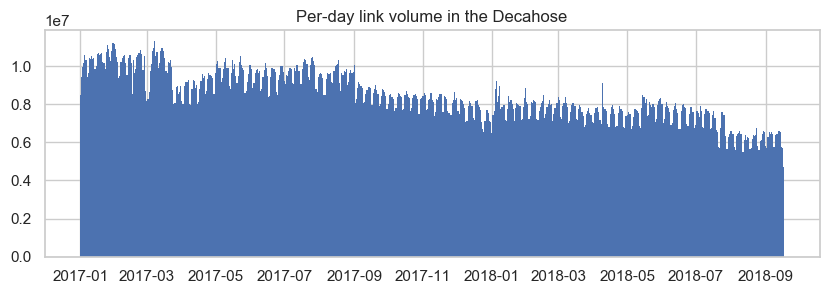

In [8]:
plt.figure(figsize=(10,3), dpi=100)

plt.title('Per-day link volume in the Decahose')

plt.bar(dh_vol_links.date.unique(), dh_vol_links['count'], linewidth=0, width=1)

plt.savefig('figures/decahose-link-vol.png', bbox_inches='tight')

In [9]:
dh_vol_tweets['count'].sum()

21219935342

In [10]:
dh_vol_links['count'].sum()

5243960217

In [11]:
dh_vol_links['count'].sum() / dh_vol_tweets['count'].sum()

0.24712423164743497

In [13]:
dh_vol_tweets.date.max()

datetime.date(2018, 9, 17)

In [15]:
len(dh_vol_tweets)

625

In [16]:
overall_dc = pd.read_json('../../data/overall-domain-link-counts.json/part-00000-c2479239-2ad9-4e07-b404-d9da7280638a-c000.json', lines=True)

In [17]:
', '.join(overall_dc.dropna().sort_values('count', ascending=False).head(100).domain)

'twitter.com, youtube.com, du3a.org, facebook.com, instagram.com, d3waapp.org, google.com, curiouscat.me, tistory.com, ghared.com, naver.com, zad-muslim.com, showroom-live.com, twittascope.com, ebay.com, fllwrs.com, vine.co, amazon.com, 7asnat.com, apple.com, channel.or.jp, blogspot.com, twitcom.com.br, soundcloud.com, nytimes.com, yahoo.co.jp, cnn.com, nicovideo.jp, pscp.tv, swarmapp.com, spotify.com, ameblo.jp, 7asnh.com, tumblr.com, line.me, wordpress.com, daum.net, washingtonpost.com, twitch.tv, twitcasting.tv, insurancepremium-wd.com, seesaa.net, shindanmaker.com, amazon.co.jp, dmm.co.jp, thehill.com, theguardian.com, etsy.com, imgur.com, bbc.co.uk, paper.li, foxnews.com, fc2.com, rakuten.co.jp, careerarc.com, , gleam.io, reddit.com, ask.fm, monster-strike.com, quran.to, lawson.co.jp, reuters.com, staticflickr.com, globo.com, peing.net, billboard.com, soompi.com, grandesmedios.com, medium.com, hotpepper.jp, crowdfireapp.com, nhk.or.jp, twimg.com, vlive.tv, breitbart.com, alathkar.

In [18]:
link_ts_counts = load_ymd_df('../../data/domain-link-ts-counts.json/part-00000-9e1063a9-9847-4a0e-96fd-74c637882e67-c000.json')

In [19]:
article_ts_counts = load_ymd_df('../../data/domain-article-ts-counts.json/part-00000-edd2a29f-0be2-4ebc-bb4f-6e95f5afdc43-c000.json')

In [20]:
imp_ts_counts = load_ymd_df('../../data/domain-imp-ts-counts.json/part-00000-fb29a2f7-5c24-4ab2-bc6e-3fe1b019a902-c000.json')
imp_ts_counts = imp_ts_counts.rename(columns={'imp': 'count'})

In [21]:
link_counts = link_ts_counts.groupby('domain').sum().sort_values('count', ascending=False)[['count']].reset_index()

In [22]:
len(link_counts)

87

In [23]:
', '.join(link_counts.domain)

'nytimes.com, cnn.com, washingtonpost.com, thehill.com, theguardian.com, foxnews.com, bbc.co.uk, reuters.com, breitbart.com, huffingtonpost.com, buzzfeed.com, politico.com, rt.com, independent.co.uk, yahoo.com, nbcnews.com, bloomberg.com, forbes.com, wsj.com, thegatewaypundit.com, businessinsider.com, cbsnews.com, usatoday.com, apnews.com, dailycaller.com, rawstory.com, vice.com, npr.org, truepundit.com, thedailybeast.com, cnbc.com, time.com, telegraph.co.uk, newsweek.com, nypost.com, sputniknews.com, nydailynews.com, washingtonexaminer.com, cbc.ca, vox.com, thinkprogress.org, theatlantic.com, newyorker.com, msn.com, ft.com, slate.com, theroot.com, variety.com, inc.com, dailykos.com, judicialwatch.org, msnbc.com, motherjones.com, aljazeera.com, economist.com, washingtontimes.com, dailywire.com, infowars.com, theintercept.com, axios.com, theonion.com, politicususa.com, thetimes.co.uk, nymag.com, salon.com, qz.com, nationalreview.com, palmerreport.com, townhall.com, thefederalist.com, hb

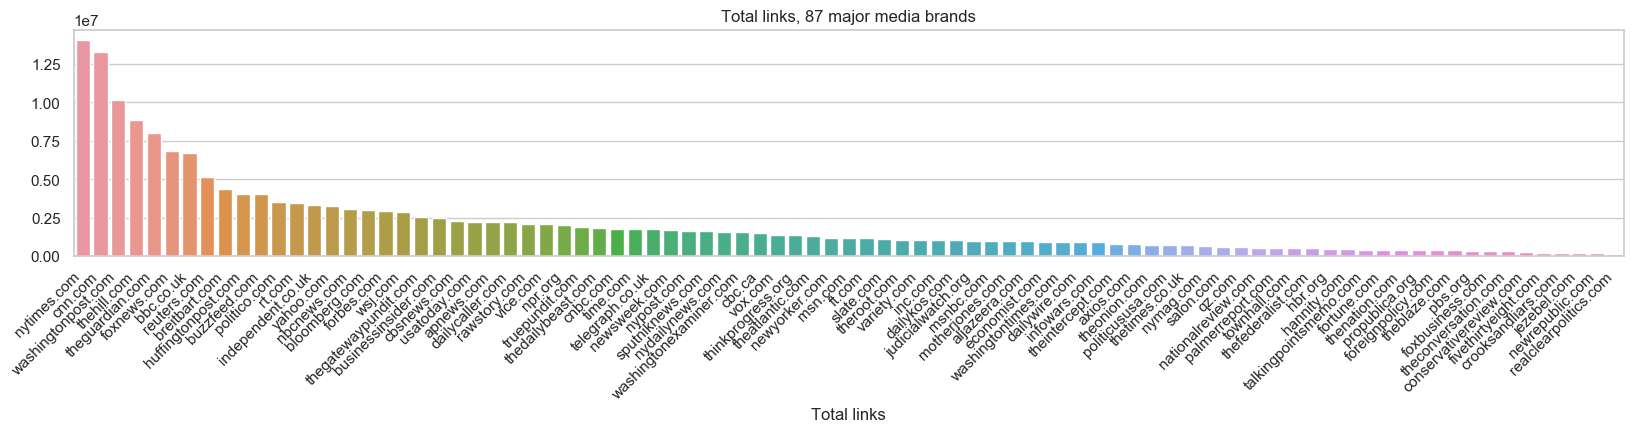

In [24]:
plt.figure(figsize=(20,3), dpi=100)

ax = sns.barplot(y='count', x='domain', data=link_counts)
plt.xticks(rotation=45, ha='right')

plt.title('Total links, 87 major media brands')
plt.xlabel('Total links')
plt.ylabel(None)
plt.savefig('figures/t87-link-counts.png', bbox_inches='tight')

In [25]:
article_counts = article_ts_counts.groupby('domain').sum().sort_values('count', ascending=False)[['count']].reset_index()

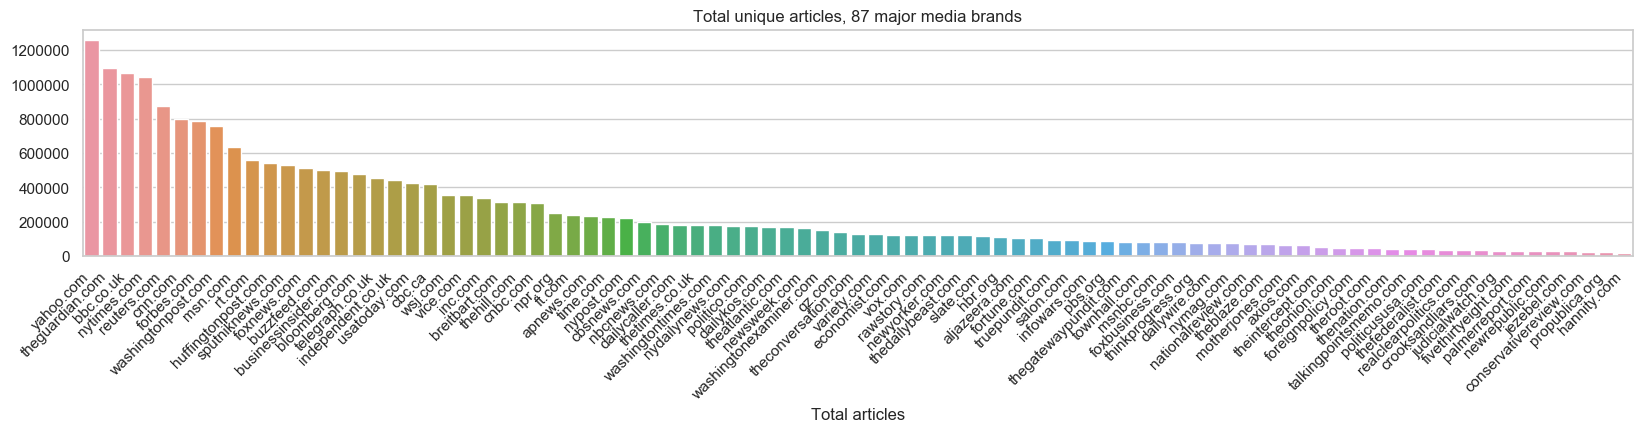

In [26]:
plt.figure(figsize=(20,3), dpi=100)

sns.barplot(y='count', x='domain', data=article_counts)
plt.xticks(rotation=45, ha='right')

plt.title('Total unique articles, 87 major media brands')
plt.xlabel('Total articles')
plt.ylabel(None)
plt.savefig('figures/t87-article-counts.png', bbox_inches='tight')

In [27]:
def plot_domain_ts(df, domain, w=10, h=3, dpi=100, title=None, dst=None):
    
    pdf = df[df.domain==domain].copy()
    pdf = pdf.sort_values('date')
    
    plt.figure(figsize=(w, h), dpi=dpi)
    
    if title:
        plt.title(title)

    plt.bar(pdf.date.unique(), pdf['count'], linewidth=0, width=1)
    
    if dst:
        plt.savefig(dst, bbox_inches='tight')

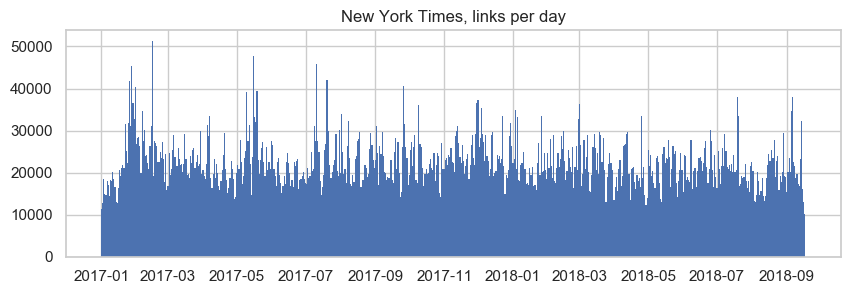

In [28]:
plot_domain_ts(link_ts_counts, 'nytimes.com', title='New York Times, links per day', dst='figures/nyt-links-per-day.png')

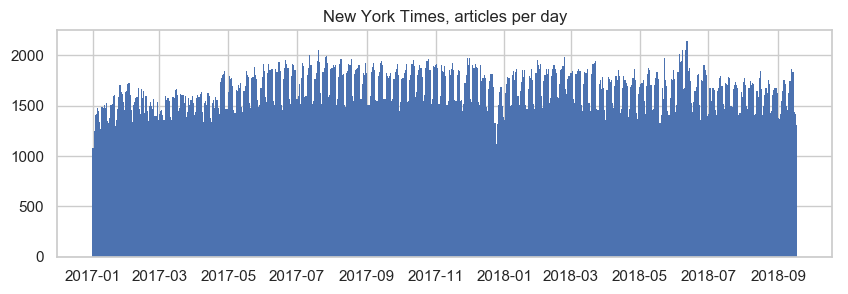

In [29]:
plot_domain_ts(article_ts_counts, 'nytimes.com', title='New York Times, articles per day', dst='figures/nyt-articles-per-day.png')

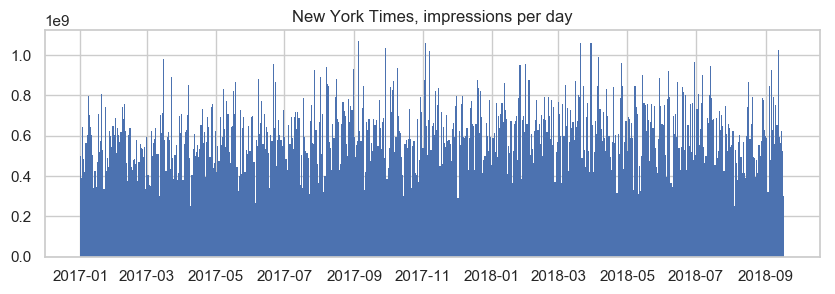

In [30]:
plot_domain_ts(imp_ts_counts, 'nytimes.com', title='New York Times, impressions per day', dst='figures/nyt-imp-per-day.png')

In [11]:
def build_lr_df(dc_df):
    
    rows = []
    for d in dc_df.domain.unique():
        pdf = dc_df[dc_df.domain==d]
        pdf = pdf[preprocessing.scale(pdf['count']) < 3]
        lr = stats.linregress(range(len(pdf.date)), pdf['count'] / pdf['count'].sum())
        rows.append((d, lr.slope, lr.pvalue))
        
    return pd.DataFrame(rows, columns=('domain', 'slope', 'p'))

In [90]:
def plot_lr(pdf, ax, title):
    y_max = pdf[preprocessing.scale(pdf['count']) < 3]['count'].max() * 1.2
    ax.set_ylim(0, y_max)
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xticks([])
    ax.bar(pdf.date.unique(), pdf['count'], linewidth=0, width=1)

In [114]:
def plot_lrs(path, asc=True):

    heights = [0.05] + [1]*10
    
    fig, axes = plt.subplots(11, 3, sharex=True, figsize=(10,10), dpi=100,
        gridspec_kw={"height_ratios": heights})
    
    axes[0][0].axis('off')
    axes[0][0].set_title('Articles', fontweight='bold')

    lr_df = build_lr_df(article_ts_counts)
    for i, r in enumerate(lr_df.sort_values('slope', ascending=asc).head(10).itertuples()):
        pdf = article_ts_counts[article_ts_counts.domain==r.domain].copy()
        plot_lr(pdf, axes[i+1][0], r.domain)
        
    axes[0][1].axis('off')
    axes[0][1].set_title('Links', fontweight='bold')

    lr_df = build_lr_df(link_ts_counts)
    for i, r in enumerate(lr_df.sort_values('slope', ascending=asc).head(10).itertuples()):
        pdf = link_ts_counts[link_ts_counts.domain==r.domain].copy()
        plot_lr(pdf, axes[i+1][1], r.domain)
        
    axes[0][2].axis('off')
    axes[0][2].set_title('Impressions', fontweight='bold')

    lr_df = build_lr_df(imp_ts_counts)
    for i, r in enumerate(lr_df.sort_values('slope', ascending=asc).head(10).itertuples()):
        pdf = imp_ts_counts[imp_ts_counts.domain==r.domain].copy()
        plot_lr(pdf, axes[i+1][2], r.domain)
        
    fig.subplots_adjust(hspace=0.5, bottom=0.1)
    plt.savefig(path, bbox_inches='tight')

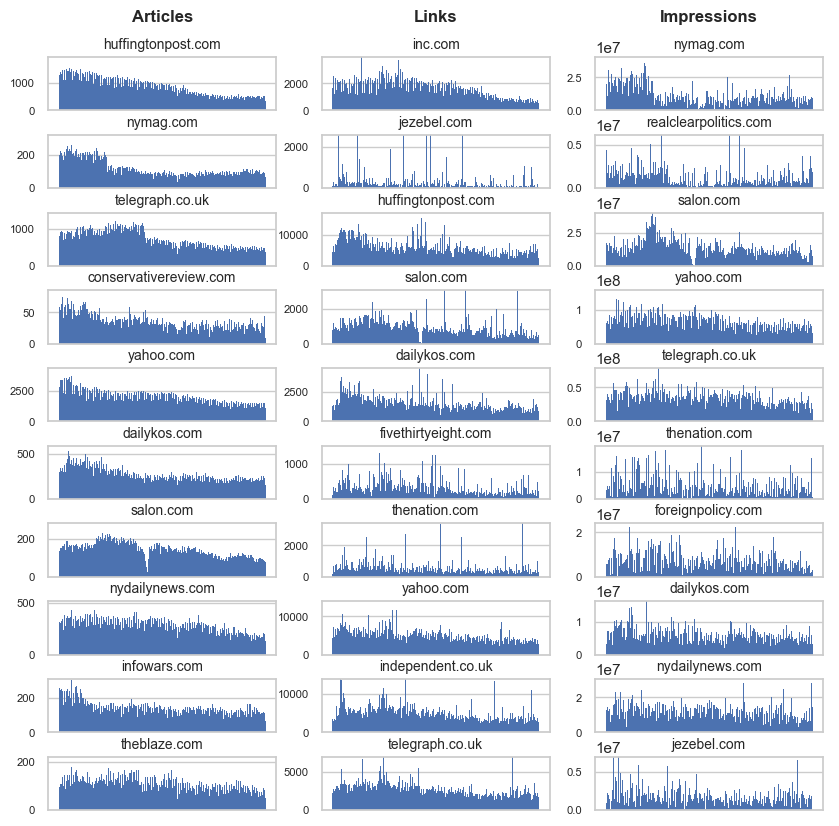

In [133]:
plot_lrs('figures/vol-dec.png', True)

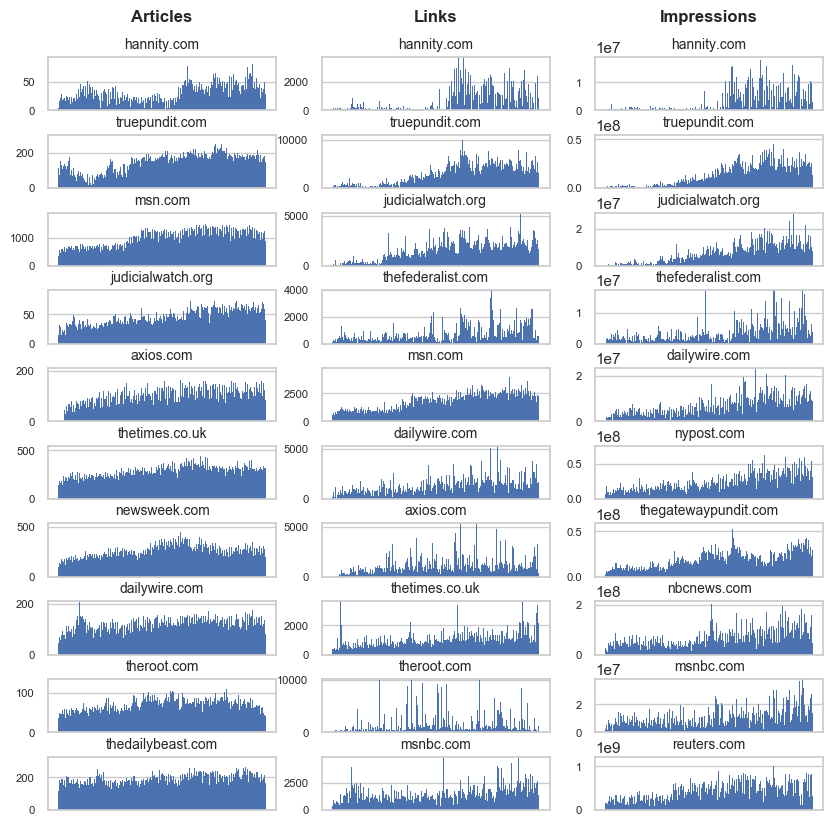

In [134]:
plot_lrs('figures/vol-inc.png', False)